# Модуль 1
## 1.1 Подготовка обучающей и тестовой выборок

На этом экзамене необходимо решить задачу определения злоумышленника по его поведению в сети Интернет. По последовательности из десяти веб-сайтов, посещенных подряд одним и тем же человеком, мы будем идентифицировать этого человека. Идея такая: пользователи Интернета по-разному переходят по ссылкам, и это может помогать их идентифицировать (кто-то сначала в почту, потом про футбол почитать, затем новости, социальная сеть, потом, наконец, – работать, кто-то – сразу работать, если это возможно).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# отключить предпреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузка данных
train = pd.read_csv('train_ses.csv', index_col='session_id')
test = pd.read_csv('test_ses.csv', index_col='session_id')

In [3]:
# посмотрим на выборку train
train.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [4]:
test.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [5]:
train['target'].isnull().sum()

0

In [6]:
print(f"Размер обучающей выборки: {train.shape}\nРазмер тестовой выборки: {test.shape}")

Размер обучающей выборки: (253561, 21)
Размер тестовой выборки: (82797, 20)


In [7]:
# уберём в отдельную переменную целевой атрибут
y = train['target']
train.drop(columns=['target'], inplace=True)

In [8]:
y.shape

(253561,)

In [9]:
y = y.reset_index().drop(columns=['session_id'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
253556,0
253557,0
253558,0
253559,0


In [10]:
# склеим train и test в единый датафрейм
data_all = pd.concat([train, test], axis=0, ignore_index=True)
data_all.shape

(336358, 20)

In [11]:
# техническая информация
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   336358 non-null  int64  
 1   time1   336358 non-null  object 
 2   site2   331406 non-null  float64
 3   time2   331406 non-null  object 
 4   site3   326994 non-null  float64
 5   time3   326994 non-null  object 
 6   site4   323503 non-null  float64
 7   time4   323503 non-null  object 
 8   site5   320170 non-null  float64
 9   time5   320170 non-null  object 
 10  site6   317061 non-null  float64
 11  time6   317061 non-null  object 
 12  site7   314137 non-null  float64
 13  time7   314137 non-null  object 
 14  site8   311375 non-null  float64
 15  time8   311375 non-null  object 
 16  site9   308568 non-null  float64
 17  time9   308568 non-null  object 
 18  site10  305858 non-null  float64
 19  time10  305858 non-null  object 
dtypes: float64(9), int64(1), object(10)
memory usage

В данных присутствуют пропуски  и невалидные значения. У атрибутов, в названии которых есть слово time, тип данных object. Эти проблемы необходимо устранить.

In [12]:
# разобьём атрибуты на группы по времени посещения и по сайтам, которые пользователь посещал
sites_df = data_all[[f'site{i}' for i in range(1, 11)]]
times_df = data_all[[f'time{i}' for i in range(1, 11)]]

In [13]:
# покажем, что есть в sites_df
sites_df.head(5)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
0,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0
2,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0
3,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0
4,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0


In [14]:
# обработаем пропуски в sites_df
sites_df.fillna(0, inplace=True)
# from nona.nona import nona
# nona(sites_df)

In [15]:
# покажем, остались ли пропуски в sites_df
sites_df.isnull().sum()/len(sites_df) * 100

site1     0.0
site2     0.0
site3     0.0
site4     0.0
site5     0.0
site6     0.0
site7     0.0
site8     0.0
site9     0.0
site10    0.0
dtype: float64

In [16]:
# приводим к целочисленному тпу данных
for col in sites_df.columns:
    sites_df[col] = sites_df[col].astype(np.int16)
sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   site1   336358 non-null  int16
 1   site2   336358 non-null  int16
 2   site3   336358 non-null  int16
 3   site4   336358 non-null  int16
 4   site5   336358 non-null  int16
 5   site6   336358 non-null  int16
 6   site7   336358 non-null  int16
 7   site8   336358 non-null  int16
 8   site9   336358 non-null  int16
 9   site10  336358 non-null  int16
dtypes: int16(10)
memory usage: 6.4 MB


In [17]:
# приводим атрибуты времени посещения сайтов к типу датавремя
for col in times_df.columns:
    times_df[col] = pd.to_datetime(times_df[col]) 
times_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336358 entries, 0 to 336357
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time1   336358 non-null  datetime64[ns]
 1   time2   331406 non-null  datetime64[ns]
 2   time3   326994 non-null  datetime64[ns]
 3   time4   323503 non-null  datetime64[ns]
 4   time5   320170 non-null  datetime64[ns]
 5   time6   317061 non-null  datetime64[ns]
 6   time7   314137 non-null  datetime64[ns]
 7   time8   311375 non-null  datetime64[ns]
 8   time9   308568 non-null  datetime64[ns]
 9   time10  305858 non-null  datetime64[ns]
dtypes: datetime64[ns](10)
memory usage: 25.7 MB


In [18]:
times_df.head(5)

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
0,2014-02-20 10:02:45,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2014-02-22 11:19:50,2014-02-22 11:19:50,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:51,2014-02-22 11:19:52,2014-02-22 11:19:52,2014-02-22 11:20:15,2014-02-22 11:20:16
2,2013-12-16 16:40:17,2013-12-16 16:40:18,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:19,2013-12-16 16:40:20,2013-12-16 16:40:21,2013-12-16 16:40:22,2013-12-16 16:40:24
3,2014-03-28 10:52:12,2014-03-28 10:52:42,2014-03-28 10:53:12,2014-03-28 10:53:42,2014-03-28 10:54:12,2014-03-28 10:54:42,2014-03-28 10:55:12,2014-03-28 10:55:42,2014-03-28 10:56:12,2014-03-28 10:56:42
4,2014-02-28 10:53:05,2014-02-28 10:55:22,2014-02-28 10:55:22,2014-02-28 10:55:23,2014-02-28 10:55:23,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:55:59,2014-02-28 10:57:06,2014-02-28 10:57:11


In [19]:
data_all[[f'site{i}' for i in range(1, 11)]] = sites_df
data_all[[f'time{i}' for i in range(1, 11)]] = times_df

In [20]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
253556,0
253557,0
253558,0
253559,0


In [21]:
# вернём преобразованные данные к исходным выборкам
train = data_all.iloc[:253561]
test = data_all[253561:]

# вернуть атрибут target в train
train['target'] = y
print(f"Размер обучающей выборки: {train.shape}\nРазмер тестовой выборки: {test.shape}")

Размер обучающей выборки: (253561, 21)
Размер тестовой выборки: (82797, 20)


## 1.2 Работа с разряженным форматом данных

Сформировать мешок сайтов. То есть необходимо создать новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки и столбца будет стоять число – количество раз, которое встретился сайт в сессии номер N.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def row_to_text(row):
    return ' '.join(map(str, row))

In [23]:
sites_text = sites_df.apply(row_to_text, axis=1)
sites_text

0                                     718 0 0 0 0 0 0 0 0 0
1             890 941 3847 941 942 3846 3847 3846 1516 1518
2         14769 39 14768 14769 37 39 14768 14768 14768 1...
3                   782 782 782 782 782 782 782 782 782 782
4                    22 177 175 178 177 178 175 177 177 178
                                ...                        
336353                           812 1039 676 0 0 0 0 0 0 0
336354          300 302 302 300 300 1222 302 1218 1221 1216
336355                    29 33 35 22 37 6779 30 21 23 6780
336356                 5828 23 21 804 21 3350 23 894 21 961
336357      21 1098 1098 1098 1098 1098 1098 1098 1098 1098
Length: 336358, dtype: object

In [24]:
cv = CountVectorizer()
new_features = cv.fit_transform(sites_text)
new_features.shape

(336358, 32759)

In [25]:
from scipy import sparse

# сериализация полученных матриц
sparse.save_npz('new_features_train.npz', new_features[:253561])
sparse.save_npz('new_features_test.npz', new_features[253561:])

## 1.3 Визуальный анализ данных

In [26]:
# визуализируем, в какой час заходит в сеть обычный пользователь и злоумышленник
data_all.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,718,2014-02-20 10:02:45,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT,0,NaT
1,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,2014-02-22 11:19:51,3846,2014-02-22 11:19:51,3847,2014-02-22 11:19:52,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16
2,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,2013-12-16 16:40:19,39,2013-12-16 16:40:19,14768,2013-12-16 16:40:20,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24
3,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,2014-03-28 10:54:12,782,2014-03-28 10:54:42,782,2014-03-28 10:55:12,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42
4,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,2014-02-28 10:55:23,178,2014-02-28 10:55:59,175,2014-02-28 10:55:59,177,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11


In [27]:
# выделим атрибут, который содержит час начала сессии
train['start_hour'] = train['time1'].dt.hour
test['start_hour'] = test['time1'].dt.hour

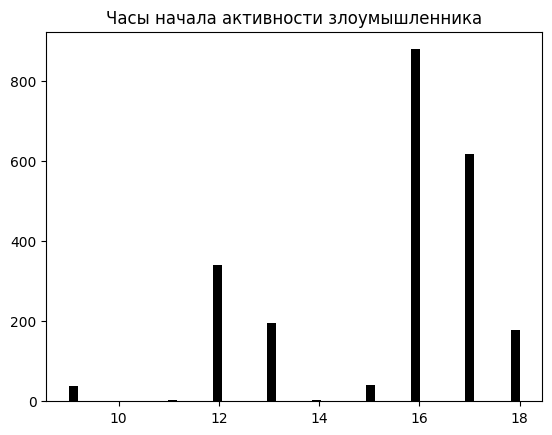

In [28]:
train[train['target'] == 1]['start_hour'].hist(color='black', bins=50)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

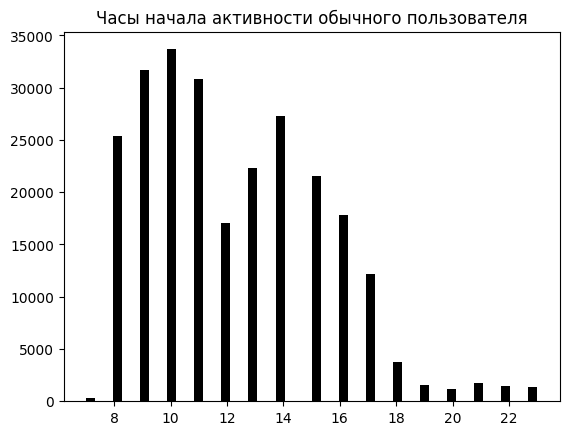

In [29]:
train[train['target'] == 0]['start_hour'].hist(color='black', bins=50)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

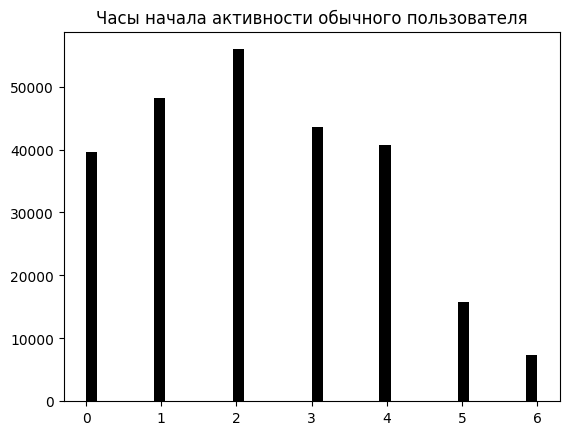

In [30]:
train['weekday'] = train['time1'].dt.weekday
test['weekday'] = test['time1'].dt.weekday
train[train['target'] == 0]['weekday'].hist(color='black', bins=40)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

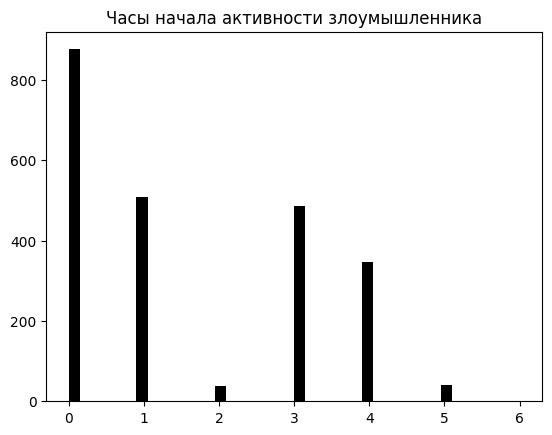

In [31]:
train[train['target'] == 1]['weekday'].hist(color='black', bins=40)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

In [32]:
train['weekend'] = train['weekday'].apply(lambda x: 1 if x == 5 or x == 6 else 0)
test['weekend'] = test['weekday'].apply(lambda x: 1 if x == 5 or x == 6 else 0)

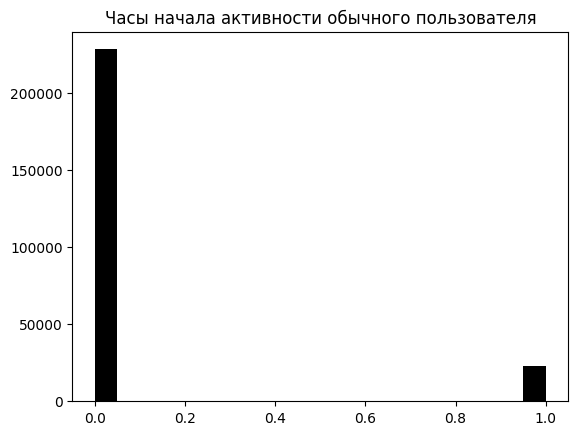

In [33]:
train[train['target'] == 0]['weekend'].hist(color='black', bins=20)
plt.title('Часы начала активности обычного пользователя')
plt.grid(False);

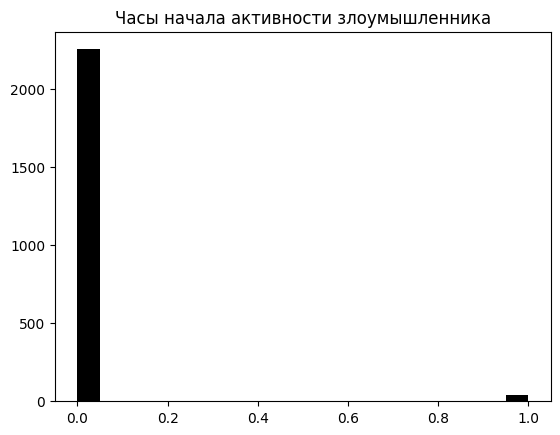

In [34]:
train[train['target'] == 1]['weekend'].hist(color='black', bins=20)
plt.title('Часы начала активности злоумышленника')
plt.grid(False);

In [35]:
def get_session_duration(row):
    min_time = min(list(row[[f'time{i}' for i in range(1, 11)]]))
    max_time = max(list(row[[f'time{i}' for i in range(1, 11)]]))
    time_delta = max_time - min_time
    return time_delta.seconds

In [36]:
train['session_duration'] = train.apply(get_session_duration, axis=1)
train

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time8,site9,time9,site10,time10,target,start_hour,weekday,weekend,session_duration
0,718,2014-02-20 10:02:45,0,NaT,0,NaT,0,NaT,0,NaT,...,NaT,0,NaT,0,NaT,0,10,3,0,0
1,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,2014-02-22 11:19:51,...,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0,11,5,1,26
2,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,2013-12-16 16:40:19,...,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0,16,0,0,7
3,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,2014-03-28 10:54:12,...,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0,10,4,0,270
4,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,2014-02-28 10:55:23,...,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0,10,4,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253556,3474,2013-11-25 10:26:54,3474,2013-11-25 10:26:58,141,2013-11-25 10:27:03,2428,2013-11-25 10:27:04,106,2013-11-25 10:27:13,...,2013-11-25 10:27:40,2428,2013-11-25 10:27:52,148,2013-11-25 10:27:53,0,10,0,0,59
253557,12727,2013-03-12 16:01:15,12727,2013-03-12 16:01:16,2215,2013-03-12 16:01:16,38,2013-03-12 16:01:17,2215,2013-03-12 16:01:17,...,2013-03-12 16:01:18,23,2013-03-12 16:01:18,21,2013-03-12 16:01:18,0,16,1,0,3
253558,2661,2013-09-12 14:05:03,15004,2013-09-12 14:05:10,5562,2013-09-12 14:05:10,5562,2013-09-12 14:06:29,5562,2013-09-12 14:06:30,...,NaT,0,NaT,0,NaT,0,14,3,0,87
253559,812,2013-12-19 15:20:22,676,2013-12-19 15:20:22,814,2013-12-19 15:20:22,22,2013-12-19 15:20:22,39,2013-12-19 15:20:22,...,2013-12-19 15:20:23,22,2013-12-19 15:20:24,570,2013-12-19 15:20:24,0,15,3,0,2


In [37]:
test['session_duration'] = test.apply(get_session_duration, axis=1)
test

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site8,time8,site9,time9,site10,time10,start_hour,weekday,weekend,session_duration
253561,29,2014-10-04 11:19:53,35,2014-10-04 11:19:53,22,2014-10-04 11:19:54,321,2014-10-04 11:19:54,23,2014-10-04 11:19:54,...,21,2014-10-04 11:19:54,-20954,2014-10-04 11:20:00,15336,2014-10-04 11:20:00,11,5,1,7
253562,782,2014-07-03 11:00:28,782,2014-07-03 11:00:53,782,2014-07-03 11:00:58,782,2014-07-03 11:01:06,782,2014-07-03 11:01:09,...,782,2014-07-03 11:01:29,782,2014-07-03 11:01:30,782,2014-07-03 11:01:53,11,3,0,85
253563,55,2014-12-05 15:55:12,55,2014-12-05 15:55:13,55,2014-12-05 15:55:14,55,2014-12-05 15:56:15,55,2014-12-05 15:56:16,...,55,2014-12-05 15:56:19,1445,2014-12-05 15:56:33,1445,2014-12-05 15:56:36,15,4,0,84
253564,1023,2014-11-04 10:03:19,1022,2014-11-04 10:03:19,50,2014-11-04 10:03:20,222,2014-11-04 10:03:21,202,2014-11-04 10:03:21,...,48,2014-11-04 10:03:22,48,2014-11-04 10:03:23,3374,2014-11-04 10:03:23,10,1,0,4
253565,301,2014-05-16 15:05:31,301,2014-05-16 15:05:32,301,2014-05-16 15:05:33,66,2014-05-16 15:05:39,67,2014-05-16 15:05:40,...,68,2014-05-16 15:05:40,71,2014-05-16 15:05:40,167,2014-05-16 15:05:44,15,4,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336353,812,2014-10-02 18:20:09,1039,2014-10-02 18:20:09,676,2014-10-02 18:20:09,0,NaT,0,NaT,...,0,NaT,0,NaT,0,NaT,18,3,0,0
336354,300,2014-05-26 14:16:40,302,2014-05-26 14:16:41,302,2014-05-26 14:16:44,300,2014-05-26 14:16:44,300,2014-05-26 14:17:19,...,1218,2014-05-26 14:17:19,1221,2014-05-26 14:17:19,1216,2014-05-26 14:17:19,14,0,0,39
336355,29,2014-05-02 11:21:56,33,2014-05-02 11:21:56,35,2014-05-02 11:21:56,22,2014-05-02 11:22:03,37,2014-05-02 11:22:03,...,21,2014-05-02 11:22:04,23,2014-05-02 11:22:04,6780,2014-05-02 11:22:04,11,4,0,8
336356,5828,2014-05-03 10:05:25,23,2014-05-03 10:05:27,21,2014-05-03 10:05:27,804,2014-05-03 10:05:27,21,2014-05-03 10:05:36,...,894,2014-05-03 10:05:38,21,2014-05-03 10:05:38,961,2014-05-03 10:05:38,10,5,1,13


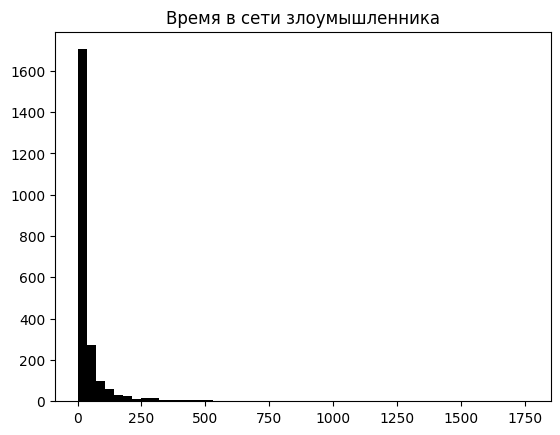

In [38]:
train[train['target'] == 1]['session_duration'].hist(color='black', bins=50)
plt.title('Время в сети злоумышленника')
plt.grid(False);

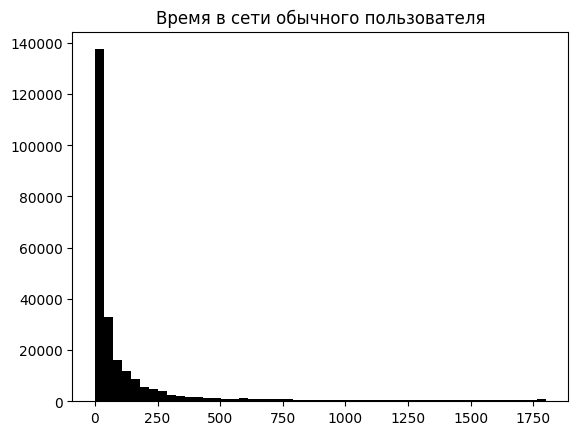

In [39]:
train[train['target'] == 0]['session_duration'].hist(color='black', bins=50)
plt.title('Время в сети обычного пользователя')
plt.grid(False);

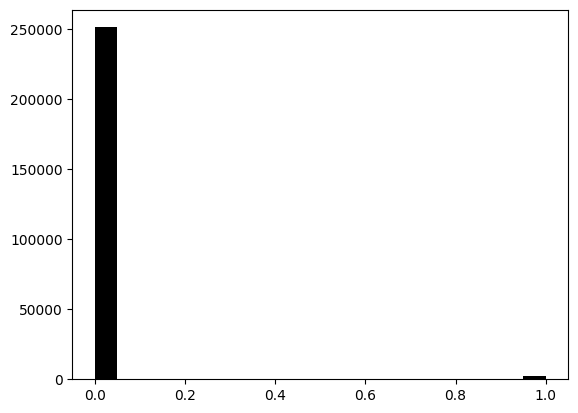

In [40]:
train['target'].hist(color='black', bins=20)
plt.grid(False);

## 1.4 Конструирование признаков (Feature Engineering)
Необходимо создать такой признак, который будет представлять собой число вида ГГГГММ от той даты, когда проходила сессия. Например, 201407 - 2014 год и 7 месяц. Таким образом, мы будем учитывать помесячный линейный тренд за весь период предоставленных данных.

In [41]:
train['ГГГГММ'] = train['time1'].apply(lambda x: str(x.year)) +\
    train['time1'].apply(lambda x: '0'+str(x.month) if len(str(x.month)) < 2 else str(x.month))

test['ГГГГММ'] = test['time1'].apply(lambda x: str(x.year)) +\
    test['time1'].apply(lambda x: '0'+str(x.month) if len(str(x.month)) < 2 else str(x.month))

train['ГГГГММ']

0         201402
1         201402
2         201312
3         201403
4         201402
           ...  
253556    201311
253557    201303
253558    201309
253559    201312
253560    201404
Name: ГГГГММ, Length: 253561, dtype: object

In [42]:
train['ГГГГММ'] = train['ГГГГММ'].astype(np.int32)
test['ГГГГММ'] = test['ГГГГММ'].astype(np.int32)
train['ГГГГММ'].dtype

dtype('int32')

## 1.5 Сохранение данных

In [43]:
times = [f'time{i}' for i in range(1, 11)]
for col in times:
    train[col] = train[col].astype(np.int64) / 10 ** 9
    test[col] = test[col].astype(np.int64) / 10 ** 9

In [44]:
train[times]

,time1,time2,time3,time4,time5,time6,time7,time8,time9,time10
0,1.392891e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09
1,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09,1.393068e+09
2,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09,1.387212e+09
3,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09,1.396004e+09
4,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09,1.393585e+09
...,...,...,...,...,...,...,...,...,...,...
253556,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09,1.385375e+09
253557,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09,1.363104e+09
253558,1.378995e+09,1.378995e+09,1.378995e+09,1.378995e+09,1.378995e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09,-9.223372e+09
253559,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09,1.387466e+09


In [45]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

## 1.6 Итог
Данные предобработаны. Изменены типы данных, обработаны пропуски. И т. д.

In [46]:
train.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site9,time9,site10,time10,target,start_hour,weekday,weekend,session_duration,ГГГГММ
0,718,1.392891e+09,0,-9.223372e+09,0,-9.223372e+09,0,-9.223372e+09,0,-9.223372e+09,...,0,-9.223372e+09,0,-9.223372e+09,0,10,3,0,0,201402
1,890,1.393068e+09,941,1.393068e+09,3847,1.393068e+09,941,1.393068e+09,942,1.393068e+09,...,1516,1.393068e+09,1518,1.393068e+09,0,11,5,1,26,201402
2,14769,1.387212e+09,39,1.387212e+09,14768,1.387212e+09,14769,1.387212e+09,37,1.387212e+09,...,14768,1.387212e+09,14768,1.387212e+09,0,16,0,0,7,201312
3,782,1.396004e+09,782,1.396004e+09,782,1.396004e+09,782,1.396004e+09,782,1.396004e+09,...,782,1.396004e+09,782,1.396004e+09,0,10,4,0,270,201403
4,22,1.393585e+09,177,1.393585e+09,175,1.393585e+09,178,1.393585e+09,177,1.393585e+09,...,177,1.393585e+09,178,1.393585e+09,0,10,4,0,246,201402


In [47]:
train.isnull().sum()

site1               0
time1               0
site2               0
time2               0
site3               0
time3               0
site4               0
time4               0
site5               0
time5               0
site6               0
time6               0
site7               0
time7               0
site8               0
time8               0
site9               0
time9               0
site10              0
time10              0
target              0
start_hour          0
weekday             0
weekend             0
session_duration    0
ГГГГММ              0
dtype: int64

In [48]:
test.head(5)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time8,site9,time9,site10,time10,start_hour,weekday,weekend,session_duration,ГГГГММ
253561,29,1.412422e+09,35,1.412422e+09,22,1.412422e+09,321,1.412422e+09,23,1.412422e+09,...,1.412422e+09,-20954,1.412422e+09,15336,1.412422e+09,11,5,1,7,201410
253562,782,1.404385e+09,782,1.404385e+09,782,1.404385e+09,782,1.404385e+09,782,1.404385e+09,...,1.404385e+09,782,1.404385e+09,782,1.404385e+09,11,3,0,85,201407
253563,55,1.417795e+09,55,1.417795e+09,55,1.417795e+09,55,1.417795e+09,55,1.417795e+09,...,1.417795e+09,1445,1.417795e+09,1445,1.417795e+09,15,4,0,84,201412
253564,1023,1.415095e+09,1022,1.415095e+09,50,1.415095e+09,222,1.415095e+09,202,1.415095e+09,...,1.415095e+09,48,1.415095e+09,3374,1.415095e+09,10,1,0,4,201411
253565,301,1.400253e+09,301,1.400253e+09,301,1.400253e+09,66,1.400253e+09,67,1.400253e+09,...,1.400253e+09,71,1.400253e+09,167,1.400253e+09,15,4,0,13,201405
